<a href="https://colab.research.google.com/github/adnaneaabbar/stock-trading-system/blob/master/AutomatedTradingStrategyAppleStocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building the Strategy

In [0]:
import pandas as pd
import numpy as np
from datetime import datetime 
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
AAPL = pd.read_csv("https://raw.githubusercontent.com/adnaneaabbar/stock-trading-system/master/data/AAPL.csv")
print(AAPL.head())
print(AAPL.tail())

         Date       Open       High        Low      Close  Adj Close     Volume
0  2006-10-02  10.728572  10.838572  10.614285  10.694285   9.258014  178159800
1  2006-10-03  10.635715  10.707143  10.455714  10.582857   9.161551  197677200
2  2006-10-04  10.585714  10.780000  10.451428  10.768572   9.322326  207270700
3  2006-10-05  10.647142  10.880000  10.590000  10.690000   9.254304  170970800
4  2006-10-06  10.631429  10.720000  10.544286  10.602858   9.178867  116739700
            Date       Open       High  ...      Close  Adj Close    Volume
1318  2011-12-23  57.098572  57.655716  ...  57.618572  49.880241  67349800
1319  2011-12-27  57.585712  58.441429  ...  58.075714  50.275993  66269000
1320  2011-12-28  58.127144  58.321430  ...  57.520000  49.794914  57165500
1321  2011-12-29  57.628571  57.950001  ...  57.874287  50.101627  53994500
1322  2011-12-30  57.644287  58.040001  ...  57.857143  50.086784  44915500

[5 rows x 7 columns]


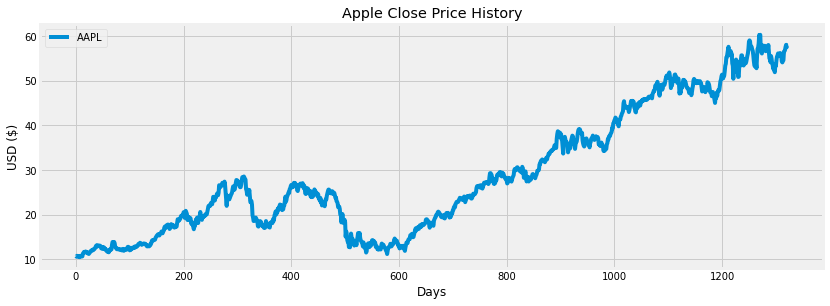

In [3]:
plt.figure(figsize=(12.5, 4.5))
plt.plot(AAPL['Close'], label='AAPL')
plt.title('Apple Close Price History')
plt.xlabel('Days')
plt.ylabel('USD ($)')
plt.legend(loc='upper left')
plt.show()

In [4]:
SMA30 = pd.DataFrame()
SMA30['Close'] = AAPL['Close'].rolling(30, min_periods=1, center=False).mean()
SMA30

,Close
0,10.694285
1,10.638571
2,10.681905
3,10.683929
4,10.667714
...,...
1318,54.903238
1319,55.007572
1320,55.118905
1321,55.196476


In [5]:
SMA100 = pd.DataFrame()
SMA100['Close'] = AAPL['Close'].rolling(100, min_periods=1, center=False).mean()
SMA100

,Close
0,10.694285
1,10.638571
2,10.681905
3,10.683929
4,10.667714
...,...
1318,55.406957
1319,55.448614
1320,55.490072
1321,55.564229


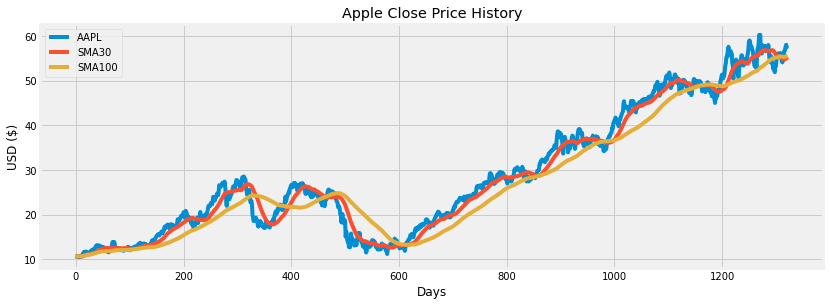

In [6]:
plt.figure(figsize=(12.5, 4.5))
plt.plot(AAPL['Close'], label='AAPL')
plt.plot(SMA30['Close'], label="SMA30")
plt.plot(SMA100['Close'], label="SMA100")
plt.title('Apple Close Price History')
plt.xlabel('Days')
plt.ylabel('USD ($)')
plt.legend(loc='upper left')
plt.show()

# Creating the Signals

In [7]:
signals = pd.DataFrame(index=AAPL.index)
signals['signal'] = 0.0
signals['SMA30'] = SMA30['Close']
signals['SMA100'] = SMA100['Close']
signals['signal'][30:] = np.where(signals['SMA30'][30:] 
                                            > signals['SMA100'][30:], 1.0, 0.0)
signals['positions'] = signals['signal'].diff()
signals

,signal,SMA30,SMA100,positions
0,0.0,10.694285,10.694285,NaN
1,0.0,10.638571,10.638571,0.0
2,0.0,10.681905,10.681905,0.0
3,0.0,10.683929,10.683929,0.0
4,0.0,10.667714,10.667714,0.0
...,...,...,...,...
1318,0.0,54.903238,55.406957,0.0
1319,0.0,55.007572,55.448614,0.0
1320,0.0,55.118905,55.490072,0.0
1321,0.0,55.196476,55.564229,0.0


<Figure size 432x288 with 0 Axes>

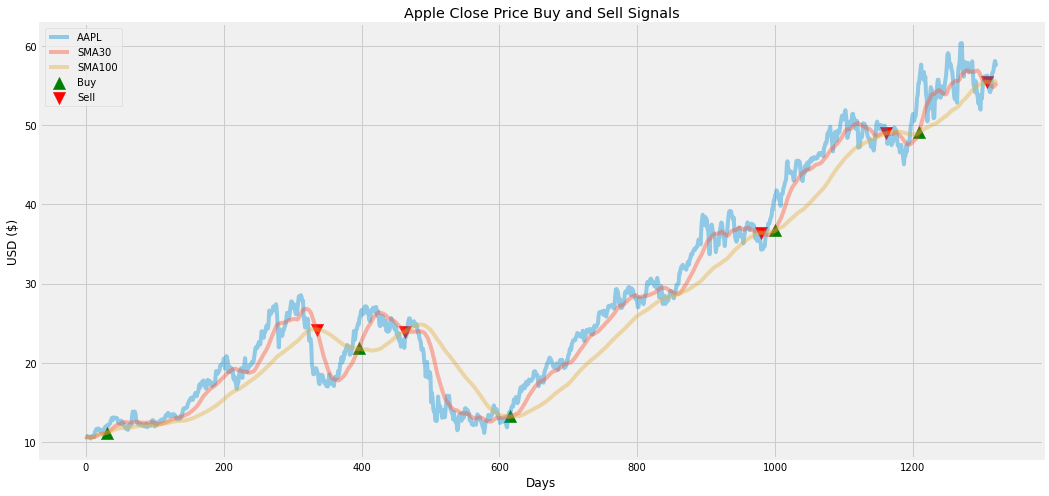

In [8]:
fig = plt.figure()
plt.figure(figsize=(16, 8))
plt.plot(AAPL['Close'], label='AAPL',alpha=0.4)
plt.plot(signals['SMA30'], label="SMA30",alpha=0.4)
plt.plot(signals['SMA100'], label="SMA100",alpha=0.4)
plt.scatter(signals.loc[signals.positions == 1.0].index, signals.SMA30[signals.positions == 1.0], label="Buy", marker="^", s = 150, color='green')
plt.scatter(signals.loc[signals.positions == -1.0].index, signals.SMA30[signals.positions == -1.0], label="Sell", marker="v", s = 150, color='red')
plt.title('Apple Close Price Buy and Sell Signals')
plt.xlabel('Days')
plt.ylabel('USD ($)')
plt.legend(loc='upper left')
plt.show()


# Backtesting the Strategy

In [0]:
# Set the initial capital
initial_capital= float(10000.0)
# Create a DataFrame `positions`
positions = pd.DataFrame(index=signals.index).fillna(0.0)
# Buy a 100 shares
positions['AAPL'] = 100*signals['signal']   
# Initialize the portfolio with value owned   
portfolio = positions.multiply(AAPL['Adj Close'], axis=0)
# Store the difference in shares owned 
pos_diff = positions.diff()
# Add `holdings` to portfolio
portfolio['holdings'] = (positions.multiply(AAPL['Adj Close'], axis=0)).sum(axis=1)
# Add `cash` to portfolio
portfolio['cash'] = initial_capital - (pos_diff.multiply(AAPL['Adj Close'], axis=0)).sum(axis=1).cumsum()   
# Add `total` to portfolio
portfolio['total'] = portfolio['cash'] + portfolio['holdings']
# Add `returns` to portfolio
portfolio['returns'] = portfolio['total'].pct_change()

<Figure size 432x288 with 0 Axes>

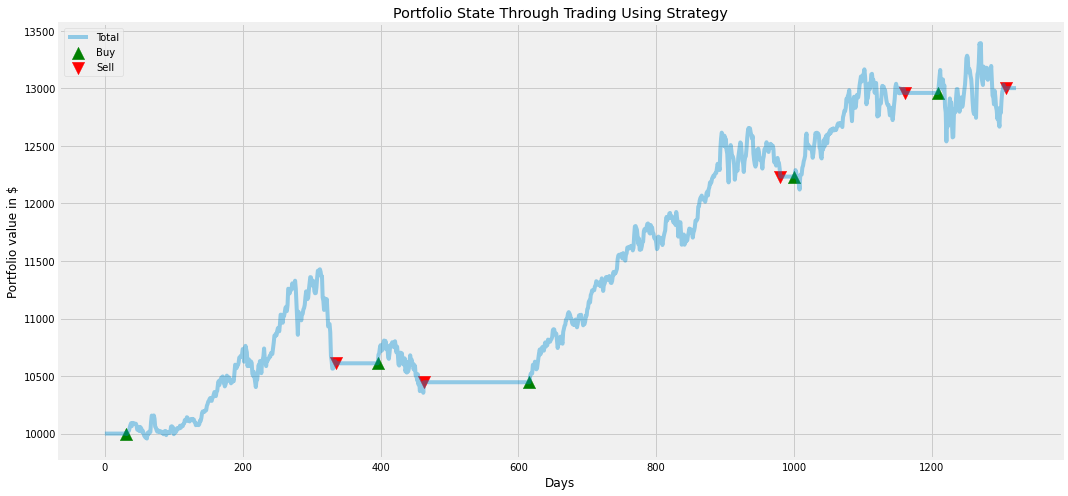

In [19]:
fig = plt.figure()
plt.figure(figsize=(16, 8))
plt.plot(portfolio['total'], label='Total',alpha=0.4)
plt.scatter(portfolio.loc[signals.positions == 1.0].index, portfolio.total[signals.positions == 1.0], label="Buy", marker="^", s = 150, color='green')
plt.scatter(portfolio.loc[signals.positions == -1.0].index, portfolio.total[signals.positions == -1.0], label="Sell", marker="v", s = 150, color='red')
plt.title('Portfolio State Through Trading Using Strategy')
plt.xlabel('Days')
plt.ylabel('Portfolio value in $')
plt.legend(loc='upper left')
plt.show()